### Data Cleaning and Visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read datasets

In [2]:
file_path18 = r"datasets\QS_2018.csv"
file_path19 = r"datasets\QS_2019.csv"
file_path20 = r"datasets\QS_2020.csv"
df18 = pd.read_csv(file_path18, encoding='latin1')
df19 = pd.read_csv(file_path19, encoding='latin1')
df20 = pd.read_csv(file_path20, encoding='latin1')

In [6]:
df18.head()

,Rank,Institution Name,Country,Year,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall
0,1,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,2018,100,100,100,99.9,100,96.1,100
1,2,STANFORD UNIVERSITY,United States,2018,100,100,100,99.4,99.6,72.7,98.7
2,3,HARVARD UNIVERSITY,United States,2018,100,100,98.3,99.9,96.5,75.2,98.4
3,4,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,2018,99.5,85.4,100,100,93.4,89.2,97.7
4,5,UNIVERSITY OF CAMBRIDGE,United Kingdom,2018,100,100,100,78.3,97.4,97.7,95.6


In [7]:
print("df18 shape:", df18.shape)
print("df19 shape:", df19.shape)
print("df20 shape:", df20.shape)

df18 shape: (980, 11)
df19 shape: (1021, 11)
df20 shape: (1024, 11)


#### Data Cleaning

In [8]:
# replace '-' and empty by NaN
df18.replace("-", np.nan, inplace=True)
df18.replace("", np.nan, inplace=True)
df18 = df18.rename(columns = {'Academic Reputation':'AR_SCORE', 'Employer Reputation':'ER_SCORE', 'Faculty Student':'FS_SCORE', 'Citations per Faculty':'CPF_SCORE', 'International Faculty':'IF_SCORE', 'International Students':'IS_SCORE'})

In [10]:
df18.head()

,Rank,Institution Name,Country,Year,AR_SCORE,ER_SCORE,FS_SCORE,CPF_SCORE,IF_SCORE,IS_SCORE,Overall
975,NaN,"UNIVERSIT? DE TECHNOLOGIE, COMPI?GNE (UTC)",France,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
976,NaN,"UNIVERSITY OF CALIFORNIA, SAN FRANCISCO (UCSF)",United States,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977,NaN,"UNIVERSITY OF ECONOMICS, PRAGUE",Czech Republic,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,NaN,WEIZMANN INSTITUTE OF SCIENCE,Israel,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,NaN,WHU OTTO BEISHEIM SCHOOL OF MANAGEMENT - KOBLENZ,Germany,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
col = df18.columns
print("\nColumns in df1:")
print(col)


Columns in df1:
Index(['Rank', 'Institution Name', 'Country', 'Year', 'AR_SCORE', 'ER_SCORE',
       'FS_SCORE', 'CPF_SCORE', 'IF_SCORE', 'IS_SCORE', 'Overall'],
      dtype='object')


In [48]:
# clean '=' and '+'
for col in df18.select_dtypes(include=['object']).columns:
    df18[col] = df18[col].str.replace("=", "", regex=False)
    df18[col] = df18[col].str.replace("+", "", regex=False)

In [49]:
# ranking cleaner
def cleaned_ranking(deger):
    if isinstance(deger, str):
        if "=" in deger:
            return int(deger.replace("=", "").strip())
        elif "-" in deger:   # replace 401-450 by 401
            first, last = map(int, deger.split("-"))
            return first
        else:
            return int(deger)
    return deger

In [50]:
df18["Rank"] = df18["Rank"].apply(cleaned_ranking)
df18 = df18.dropna(subset=["Rank"])

In [51]:
# Set which columns to keep as string
string_cols = [
    'Institution Name', 'Country'
]

In [52]:
# Set all remain columns to be float type
for col in df18.columns:
    if col not in string_cols:
        df18[col] = pd.to_numeric(df18[col], errors='coerce')

In [57]:
df18.describe()

,Rank,Year,AR_SCORE,ER_SCORE,FS_SCORE,CPF_SCORE,IF_SCORE,IS_SCORE,Overall
count,959.000000,959.0,400.000000,400.000000,501.000000,500.000000,495.00000,500.000000,501.000000
mean,458.249218,2018.0,53.407250,53.937500,47.917565,43.952600,51.03798,46.360200,47.191417
std,252.853022,0.0,26.203342,26.921822,30.298281,27.666625,35.61432,32.361631,18.600331
min,1.000000,2018.0,3.200000,1.900000,2.300000,1.000000,1.30000,1.000000,25.200000
25%,240.000000,2018.0,31.400000,32.975000,21.700000,21.450000,15.75000,17.050000,32.500000
50%,471.000000,2018.0,48.350000,49.750000,41.200000,42.600000,47.30000,40.450000,41.300000
75%,701.000000,2018.0,74.100000,76.650000,75.400000,63.725000,89.60000,77.550000,58.400000
max,801.000000,2018.0,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000


#### Data Visualization

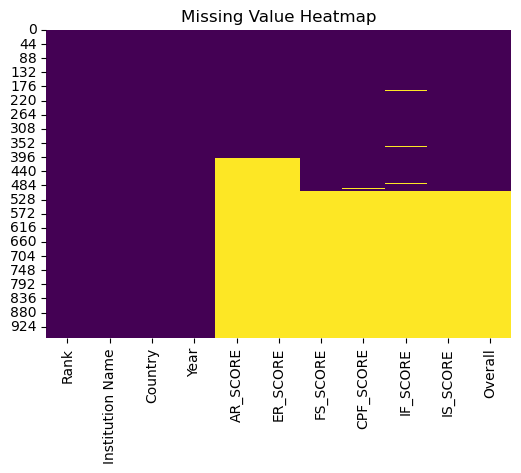

In [54]:
plt.figure(figsize=(6, 4))
sns.heatmap(df18.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

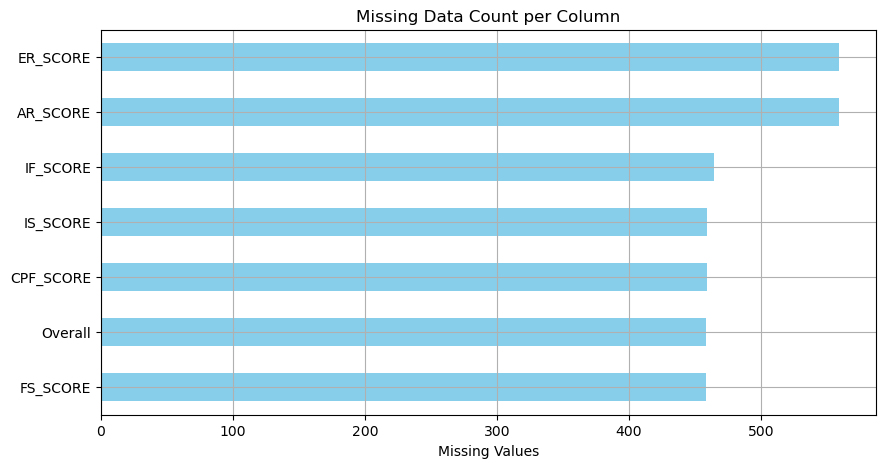

In [55]:
missing_counts = df18.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # Only reserve missing value columns
plt.figure(figsize=(10, 5))
missing_counts.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel("Missing Values")
plt.title("Missing Data Count per Column")
plt.grid(True)
plt.show()

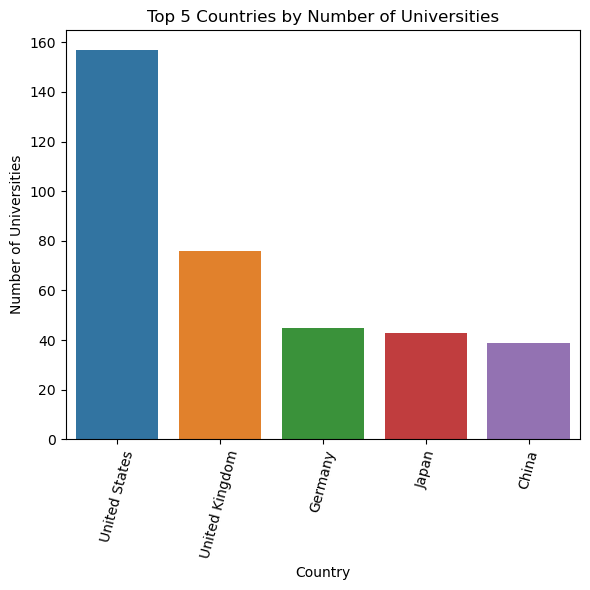

In [56]:
top_countries = df18['Country'].value_counts().head()
plt.figure(figsize=(6, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 5 Countries by Number of Universities")
plt.ylabel("Number of Universities")
plt.xlabel("Country")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [113]:
score_columns = [col for col in df18.columns if 'SCORE' in col] + ['Overall']
print(score_columns)

['AR_SCORE', 'ER_SCORE', 'FS_SCORE', 'CPF_SCORE', 'IF_SCORE', 'IS_SCORE', 'Overall']


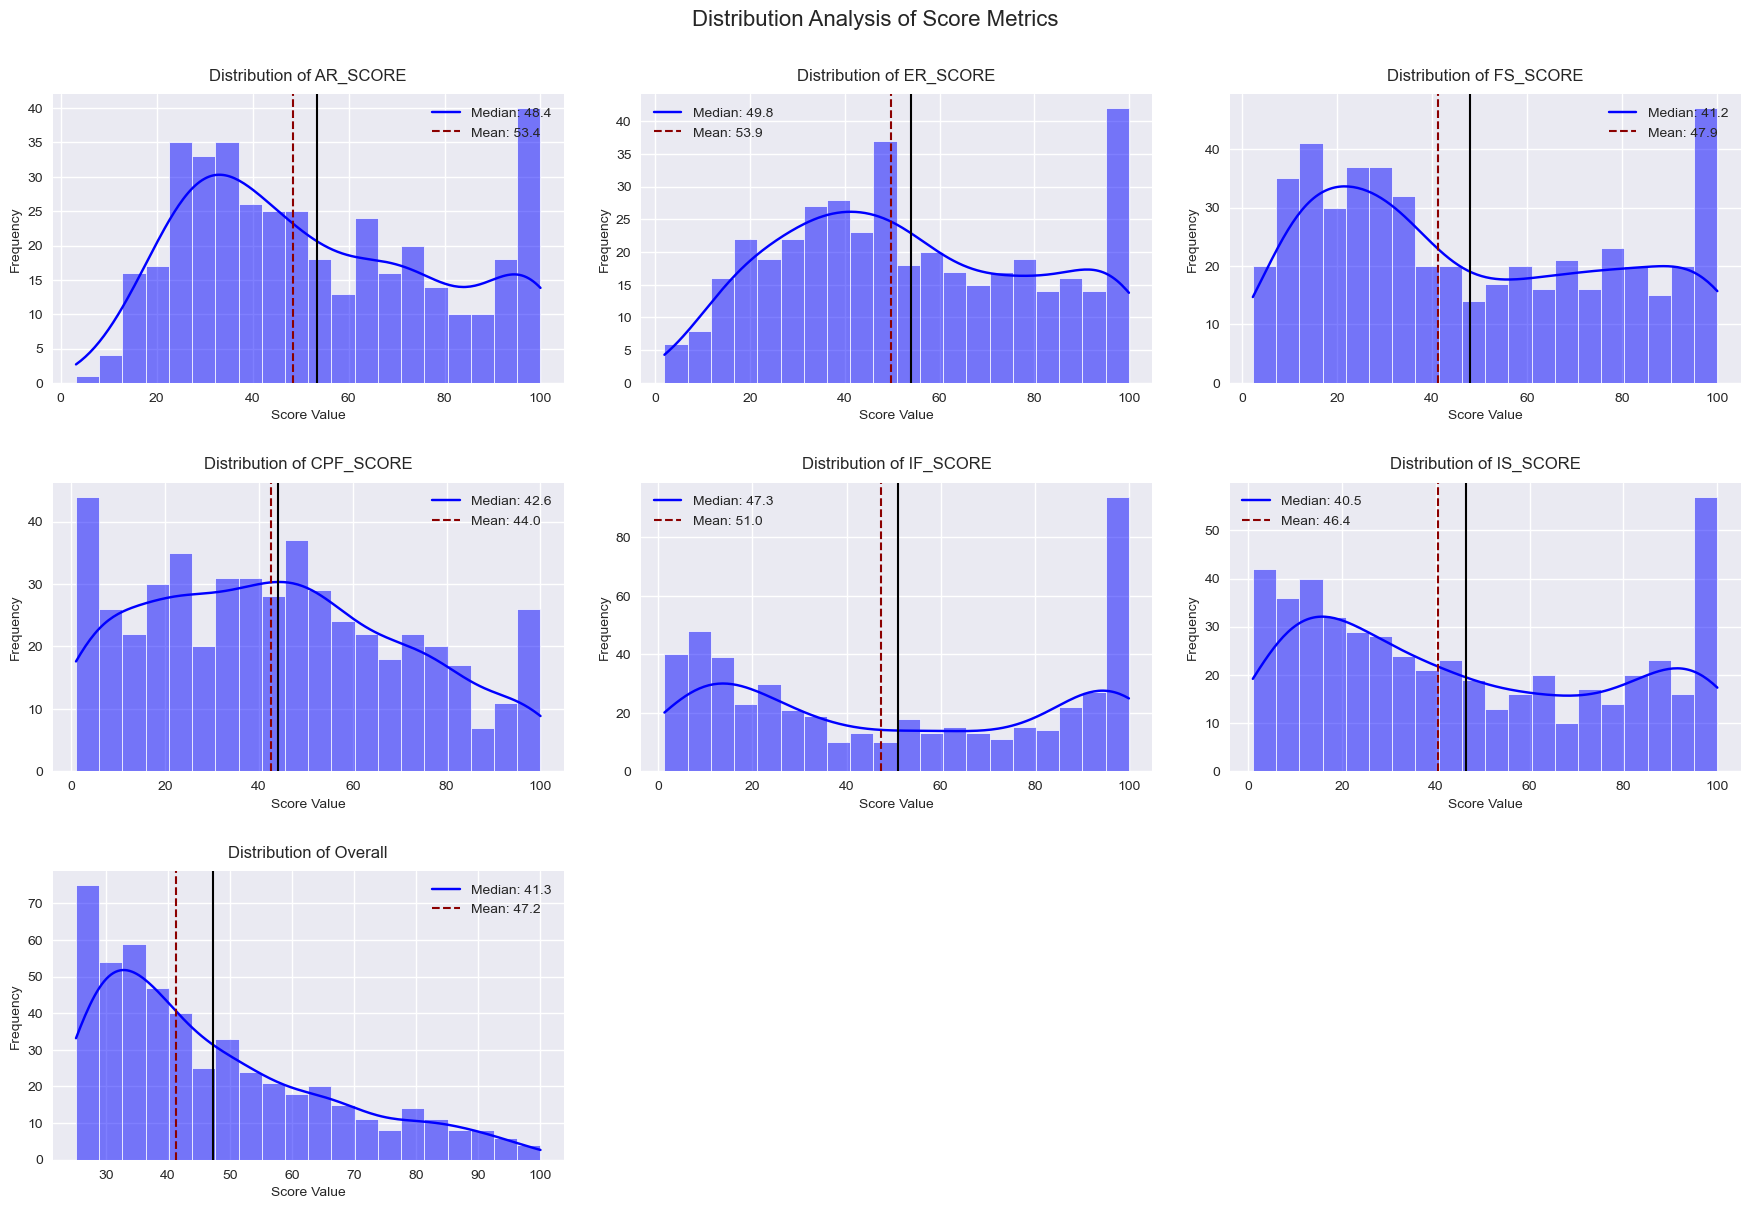

In [114]:
plt.figure(figsize=(18, 12))
plt.style.use('seaborn') 

for i, col in enumerate(score_columns, 1):
    plt.subplot(3, 3, i)
    
    sns.histplot(df18[col], kde=True, bins=20, color='blue', 
                edgecolor='white', linewidth=0.5)
    
    median = df18[col].median()
    mean = df18[col].mean()
    plt.axvline(median, color='darkred', linestyle='--', linewidth=1.5)
    plt.axvline(mean, color='black', linestyle='-', linewidth=1.5)
    
    plt.title(f'Distribution of {col}', fontsize=12, pad=10)
    plt.xlabel('Score Value', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.legend([f'Median: {median:.1f}', f'Mean: {mean:.1f}'])

plt.tight_layout(pad=2.5)
plt.suptitle('Distribution Analysis of Score Metrics', y=1.02, fontsize=16)
plt.show()

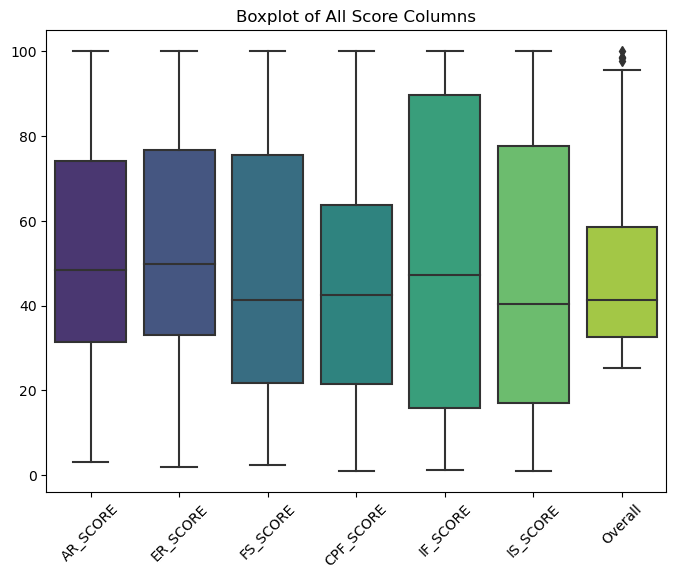

In [89]:
# Box plot comparision
plt.figure(figsize=(8, 6))
sns.boxplot(data=df18[score_columns], palette='viridis')
plt.xticks(rotation=45)
plt.title('Boxplot of All Score Columns')
plt.show()


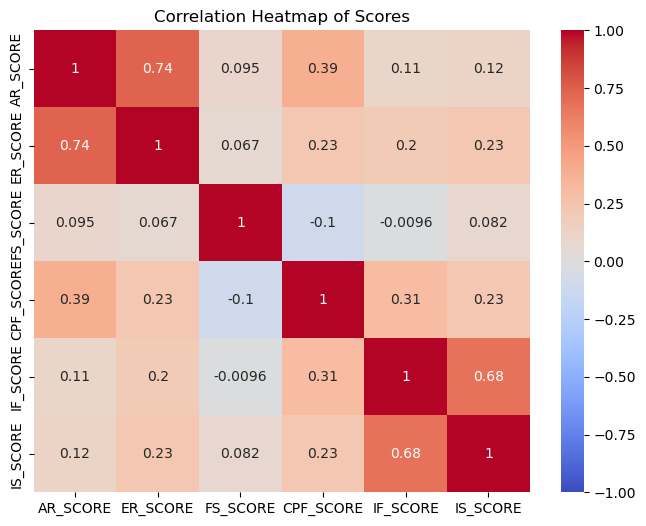

In [87]:
# Heatmap
numeric_df = df18.select_dtypes(include=[np.number])
numeric_df = numeric_df[[col for col in numeric_df.columns if 'SCORE' in col or 'RANK' in col]]
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Scores')
plt.show()